In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Load the CSV file

df = pd.read_csv('/content/PSX.csv')

# Display first rows
df.head()


,category,Current
0,Thu Feb 06 2025,110301.16
1,Tue Feb 04 2025,111935.38
2,Mon Feb 03 2025,112745.01
3,Fri Jan 31 2025,114255.73
4,Thu Jan 30 2025,113206.40


In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  247 non-null    object 
 1   Current   247 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [ ]:
#Show the missing values
df.isnull().sum()

,0
category,0
Current,0


In [ ]:
# Print column names again to confirm any hidden issues
df.columns

Index(['category', 'Current'], dtype='object')

In [ ]:
# Step 1: Rename 'category' column to 'Date' if it contains the date information
df.rename(columns={'category': 'Date'}, inplace=True)

# Step 2: Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 3: Remove rows with invalid dates
df.dropna(subset=['Date'], inplace=True)

# Step 4: Keep only relevant columns
df = df[['Date', 'Current']]

In [ ]:
# Step 2: Detect outliers using the IQR method
Q1 = df['Current'].quantile(0.25)
Q3 = df['Current'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Remove outliers
df_cleaned = df[(df['Current'] >= lower_bound) & (df['Current'] <= upper_bound)]


In [ ]:
# Step 3: Check normality using the Shapiro-Wilk test
stat, p_value = shapiro(df_cleaned['Current'])


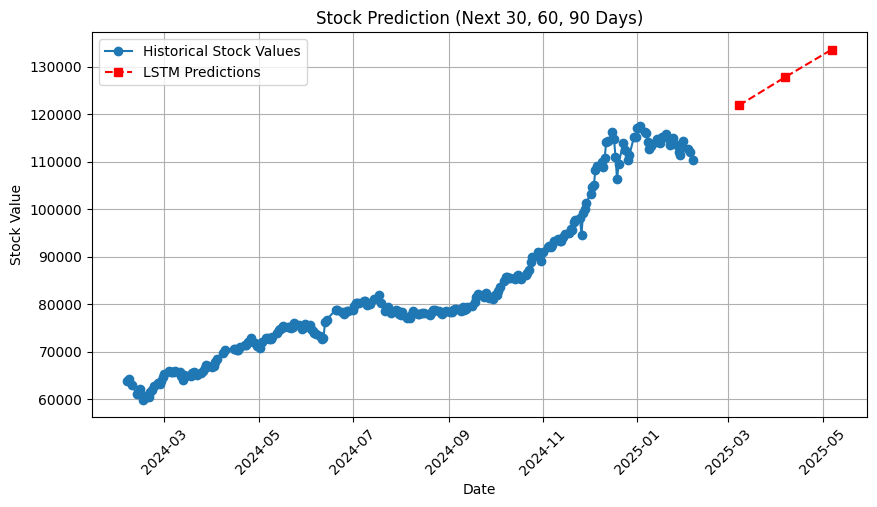

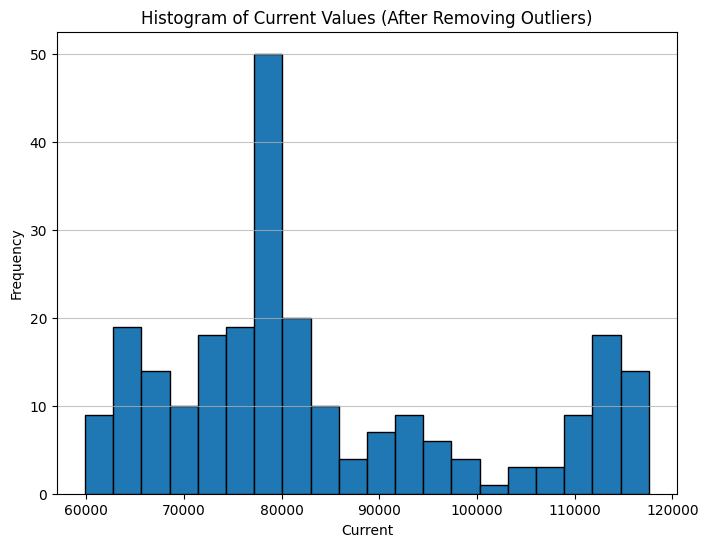

Summary of Cleaned Data:
Initial Data Count: 247
Cleaned Data Count: 247
Outliers Removed: 0
Shapiro-Wilk Test Statistic: 0.8920688984398305
Shapiro-Wilk p-value: 2.768342259528523e-12


In [ ]:
import matplotlib.pyplot as plt

# Check normality visually with histogram
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['Current'], bins=20, edgecolor='black')
plt.title('Histogram of Current Values (After Removing Outliers)')
plt.xlabel('Current')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Display results
cleaned_data_summary = {
    "Initial Data Count": len(df),
    "Cleaned Data Count": len(df_cleaned),
    "Outliers Removed": len(df) - len(df_cleaned),
    "Shapiro-Wilk Test Statistic": stat,
    "Shapiro-Wilk p-value": p_value
}

# Print results
print("Summary of Cleaned Data:")
for key, value in cleaned_data_summary.items():
    print(f"{key}: {value}")

# Stock Value Trend Over Time

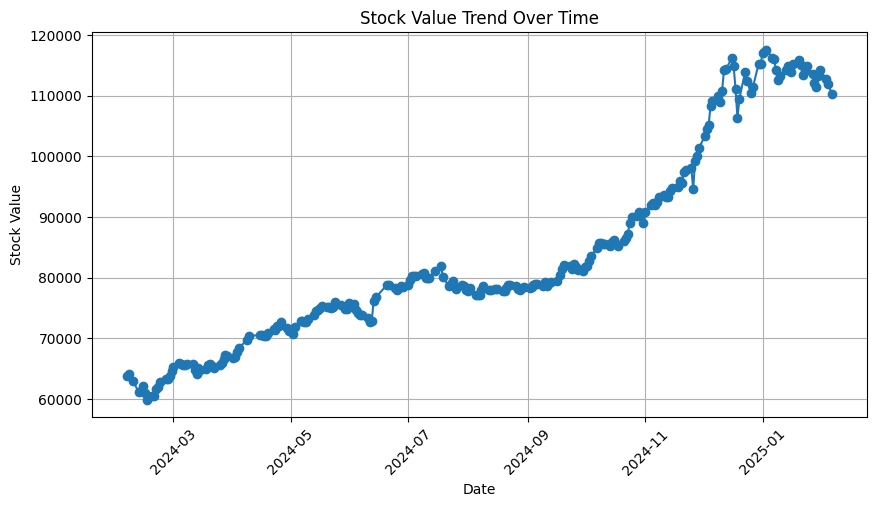

,Current
count,247.00000
mean,83958.24004
std,16318.49566
min,59872.96000
25%,72762.72000
50%,78810.49000
75%,93258.12000
max,117586.98000


In [ ]:
# Plot the stock values over time
plt.figure(figsize=(10,5))
# Replace 'Stock Value' with 'Current' as it represents stock values in the DataFrame
plt.plot(df['Date'], df['Current'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Stock Value')  # You can keep the label as 'Stock Value'
plt.title('Stock Value Trend Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Statistical summary of stock values
# Replace 'Stock Value' with 'Current' for calculations
summary_stats = df['Current'].describe()
summary_stats

Summary Statistics

Count:
There are 247 data points in the dataset.

Mean (Average Stock Value):
The average stock value is 83,958.24.

Standard Deviation (std):
The standard deviation is 16,318.50, indicating moderate variability in stock values.

Minimum and Maximum Values:
The lowest stock value is 59,872.96, and the highest is 117,586.98, showing a wide range of values.

Quartiles (25%, 50%, 75%):

25th Percentile (72762.72): 25% of the stock values are below this number.

50th Percentile (78810.49): The median value, splitting the data into two equal halves

75th Percentile (93258.12): 75% of the stock values are below this number

Key Insights:

The data appears slightly skewed towards higher stock values because the max value (117,586.98) is far from the median (78,810.49).
The standard deviation suggests the stock values vary significantly but within a predictable range.


Line Chart: Stock Value Trend Over Time

Trends:
From early 2024 to mid-2024: A gradual increase in stock value with minor fluctuations.
From mid-2024 to late 2024: A steeper increase, indicating potential growth momentum.
Late 2024 to early 2025: A slight dip after reaching a peak, suggesting possible market correction or temporary volatility.





In [ ]:
!pip install seaborn

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Calculate Moving Averages using 'Current' column (which seems to be the actual column representing Stock Values)
df['7-day MA'] = df['Current'].rolling(window=7).mean()
df['30-day MA'] = df['Current'].rolling(window=30).mean()

In [ ]:
# Calculate Daily Returns using the 'Current' column (which represents stock values)
df['Daily Return'] = df['Current'].pct_change() * 100

In [ ]:
# Identify Trends Using Moving Average Convergence Divergence (MACD)
# Replace 'Stock Value' with 'Current' as it seems to be the actual column representing Stock Values
df['12-day EMA'] = df['Current'].ewm(span=12, adjust=False).mean()
df['26-day EMA'] = df['Current'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['12-day EMA'] - df['26-day EMA']
df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [ ]:
# Correlation Analysis
# Replace 'Stock Value' with 'Current' as it seems to be the actual column representing Stock Values
correlation_matrix = df[['Current', 'Daily Return', '7-day MA', '30-day MA', 'MACD']].corr()

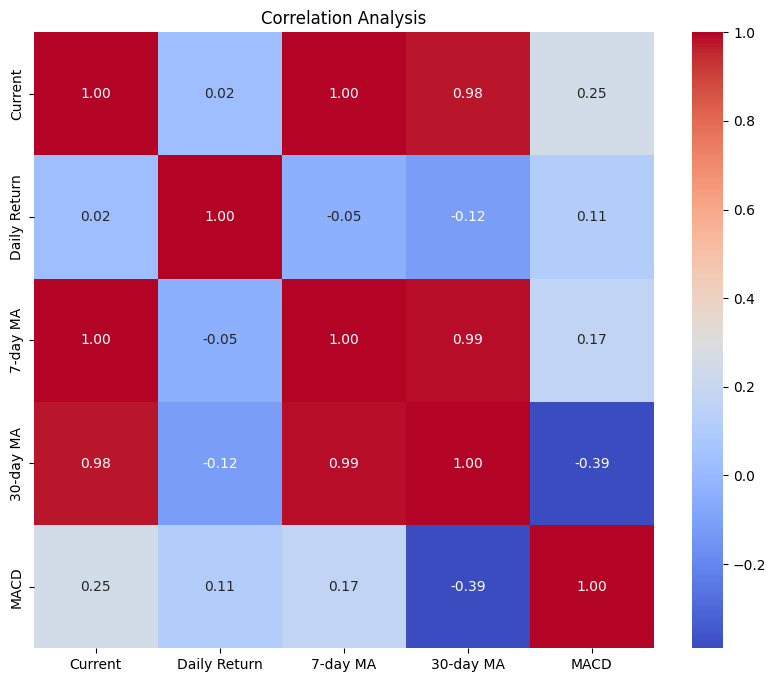

Correlation Analysis:


,Current,Daily Return,7-day MA,30-day MA,MACD
Current,1.000000,0.023423,0.995974,0.976911,0.247184
Daily Return,0.023423,1.000000,-0.046585,-0.117936,0.111905
7-day MA,0.995974,-0.046585,1.000000,0.985804,0.173526
30-day MA,0.976911,-0.117936,0.985804,1.000000,-0.389927
MACD,0.247184,0.111905,0.173526,-0.389927,1.000000


In [ ]:
# Display correlation analysis using seaborn and matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Analysis")
plt.show()

# Alternatively, display the correlation matrix directly using pandas:
print("Correlation Analysis:")
display(correlation_matrix)

Key Takeaways from the Correlation Matrix

Stock Value is heavily influenced by short-term (7-day MA) and long-term (30-day MA) trends.

Daily Returns are weakly correlated with stock values and moving averages, meaning returns fluctuate independently of overall trends.

MACD behaves differently from moving averages, showing weaker or negative correlations with stock trends.

The long-term trend (30-day MA) impacts MACD more than the short-term trend (7-day MA).

No extreme negative correlations (-1.0), meaning no direct opposing movements exist in the dataset.

Correlation Table Analysis

The table provides numerical correlation values for a more precise understanding.

Important Correlations:

7-day MA & Current Price (0.9959): Indicates that the short-term moving average is almost identical to the current price.

MACD & Current Price (0.2472): A weak positive correlation, suggesting MACD does not strongly track the current price.

MACD & 30-day MA (-0.3899): A moderate inverse relationship, meaning that as the long-term moving average rises, the MACD value declines.

Daily Return & 7-day MA (-0.0466): Close to zero, indicating almost no direct relationship between short-term returns and the short-term moving average.

Insights from the Analysis

The strong correlation between current price and moving averages suggests that price movements are well-tracked by short-term and long-term trends.

MACD shows a weaker correlation with price and moving averages, suggesting it may serve as an independent momentum indicator rather than a direct price tracker.

Daily return has weak correlations with most variables, indicating that returns fluctuate independently of these indicators.

# Daily Percentage Change In Stock Value

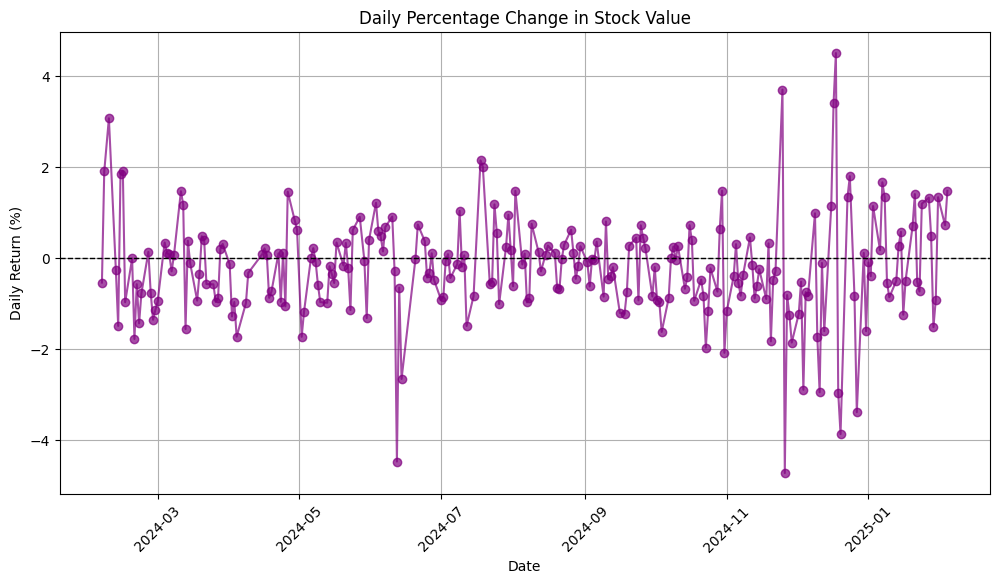

In [ ]:
# Plot Daily Returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily Return'], marker='o', linestyle='-', color='purple', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line at 0%
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.title("Daily Percentage Change in Stock Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


It shows the percentage change in stock value from one day to the next.

The fluctuations indicate the stock's volatility over time.

The black dashed line at 0% represents no change in value; points above indicate gains, while points below indicate losses.



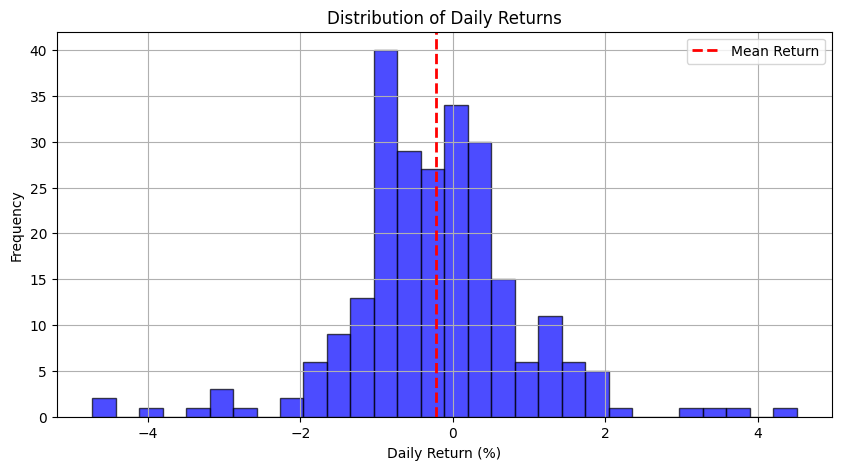

In [ ]:
# Plot Daily Return Distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Daily Return'].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(df['Daily Return'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Return')
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Returns")
plt.legend()
plt.grid(True)
plt.show()

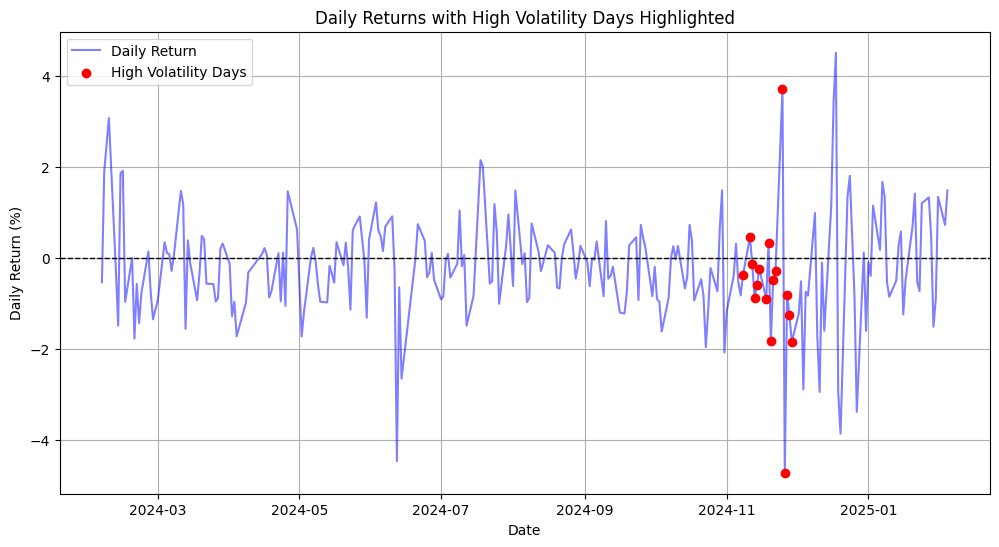

In [ ]:
# Highlight High Volatility Days on Time Series

# Identifying High Volatility Periods (Above Mean + 2 Standard Deviations)
# Calculating Rolling Volatility (Standard Deviation of Daily Returns)
df['Volatility (7-day)'] = df['Daily Return'].rolling(window=7).std()
df['Volatility (30-day)'] = df['Daily Return'].rolling(window=30).std()

volatility_threshold = df['Volatility (30-day)'].mean() + 2 * df['Volatility (30-day)'].std()
high_volatility_days = df[df['Volatility (30-day)'] > volatility_threshold]

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily Return'], color='blue', alpha=0.5, label='Daily Return')
plt.scatter(high_volatility_days['Date'], high_volatility_days['Daily Return'], color='red', label='High Volatility Days', zorder=3)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line at 0%
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.title("Daily Returns with High Volatility Days Highlighted")
plt.legend()
plt.grid(True)
plt.show()


Key Observations

General Daily Returns (Blue Line):

Most daily returns fluctuate within a range of approximately -2% to +2%.
However, there are several sharp spikes beyond this range, indicating higher volatility on specific days.
High-Volatility Days (Red Dots):

These are days with returns that exceed a defined threshold (e.g., ±3% or based on standard deviation).
They are concentrated around late 2024-November to 2025-January, with noticeable clustering of high-volatility events during this period.
Distribution of Volatility:

Early to mid-2024 shows relatively lower volatility, with fewer or no red dots.
Volatility increases sharply towards late 2024 and early 2025, likely linked to significant market events.


In [ ]:
# Calculating Rolling Volatility (Standard Deviation of Daily Returns)
df['Volatility (7-day)'] = df['Daily Return'].rolling(window=7).std()
df['Volatility (30-day)'] = df['Daily Return'].rolling(window=30).std()

In [ ]:
# Displaying High and Low Volatility Periods using display() function from IPython.display
# This replaces the ace_tools calls for displaying dataframes
from IPython.display import display  # Make sure IPython.display is imported
# Use 'Current' instead of 'Stock Value'
display(high_volatility_days[['Date', 'Current', 'Volatility (30-day)']])

# Define low_volatility_days - filter for days below the volatility threshold
volatility_threshold = df['Volatility (30-day)'].mean() + 2 * df['Volatility (30-day)'].std() # Assuming the same threshold for low volatility is desired
low_volatility_days = df[df['Volatility (30-day)'] < volatility_threshold] # changed the comparison operator to less than

display(low_volatility_days[['Date', 'Current', 'Volatility (30-day)']])

,Date,Current,Volatility (30-day)
47,2024-11-29,101357.32,1.945924
48,2024-11-28,100082.77,1.950653
49,2024-11-27,99269.25,1.952004
50,2024-11-26,94574.16,2.075838
51,2024-11-25,98079.78,2.183370
52,2024-11-22,97798.23,2.179812
53,2024-11-21,97328.40,2.156243
54,2024-11-20,95546.46,2.167318
55,2024-11-19,95856.67,2.172399
56,2024-11-18,94995.67,2.165347


,Date,Current,Volatility (30-day)
30,2024-12-24,112414.81,1.201319
31,2024-12-23,113924.42,1.195955
32,2024-12-20,109513.15,1.387737
33,2024-12-19,106274.98,1.455416
34,2024-12-18,111070.29,1.686335
...,...,...,...
242,2024-02-13,61226.93,0.978499
243,2024-02-12,61065.32,0.976448
244,2024-02-09,62943.75,1.145034
245,2024-02-07,64143.87,1.199737


Key Observations:
Volatility Trends:

The 30-day rolling volatility values increase as we move toward late November 2024.

For instance:
On 2024-11-19, volatility is 2.17%.

By 2024-11-28, volatility slightly decreases to 1.95%.

This indicates that the market experienced periods of increasing and then stabilizing volatility during this time.

High Volatility Dates:

Volatility is higher during the period between 2024-11-19 and 2024-11-25 (ranging from 2.07% to 2.18%), suggesting significant price swings during this time.
This period might align with major market events or announcements impacting stock behavior.

Stabilization:

By 2024-11-27 and 2024-11-28, the 30-day volatility starts declining, possibly indicating reduced uncertainty or the resolution of a significant event.

# Trend analysis

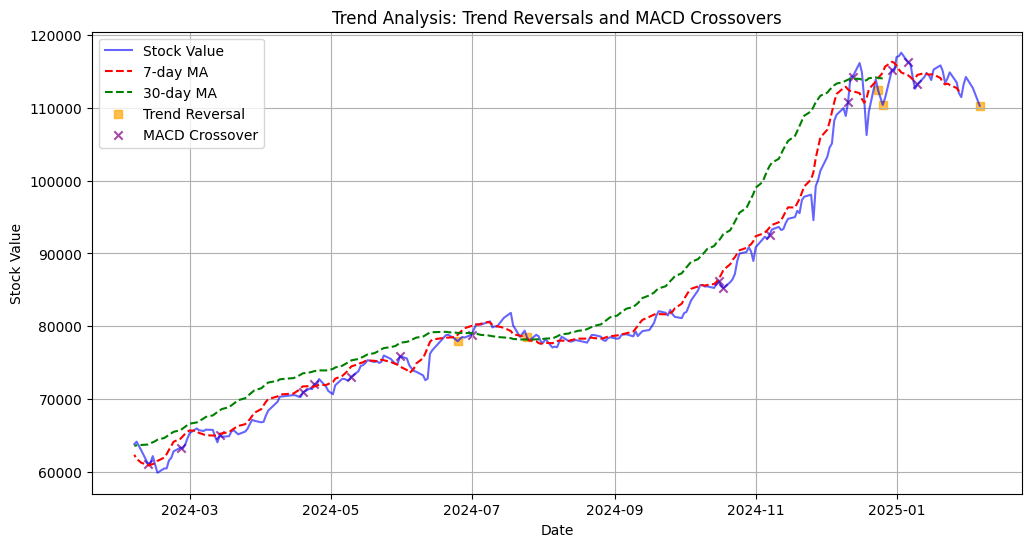

Trend Reversals:


,Date,Current,Trend
0,2025-02-06,110301.16,Neutral
29,2024-12-26,110423.32,Uptrend
30,2024-12-24,112414.81,Downtrend
136,2024-07-25,78469.33,Uptrend
156,2024-06-25,77940.58,Downtrend



MACD Crossovers:


,Date,Current,MACD,Signal Line
18,2025-01-10,113247.29,872.998431,973.515612
22,2025-01-06,116255.13,917.149150,871.093788
27,2024-12-30,115259.00,1010.112992,1034.990615
37,2024-12-13,114301.80,-98.929987,-160.822387
39,2024-12-11,110810.22,-215.124194,-148.098104
63,2024-11-07,92520.49,-4108.543394,-4153.616962
77,2024-10-18,85250.09,-3602.588601,-3574.905023
79,2024-10-16,86205.66,-3479.191525,-3557.224344
152,2024-07-01,78824.33,240.605741,330.071971
170,2024-05-31,75878.48,-1165.136417,-1190.948850


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate Moving Averages using 'Current' column
df['7-day MA'] = df['Current'].rolling(window=7).mean()
df['30-day MA'] = df['Current'].rolling(window=30).mean()

# Calculate MACD and Signal Line first
# Replace 'Stock Value' with 'Current' as it seems to be the actual column representing Stock Values
df['12-day EMA'] = df['Current'].ewm(span=12, adjust=False).mean()
df['26-day EMA'] = df['Current'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['12-day EMA'] - df['26-day EMA']
df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Now you can proceed with the trend identification code:
df['Trend'] = 'Neutral'
df.loc[df['7-day MA'] > df['30-day MA'], 'Trend'] = 'Uptrend'
df.loc[df['7-day MA'] < df['30-day MA'], 'Trend'] = 'Downtrend'

# Identifying Trend Reversals using Moving Averages and MACD Crossovers
# This part remains the same
df['Trend'] = 'Neutral'  # Recalculate trend if necessary
df.loc[df['7-day MA'] > df['30-day MA'], 'Trend'] = 'Uptrend'
df.loc[df['7-day MA'] < df['30-day MA'], 'Trend'] = 'Downtrend'

# Identifying MACD Crossovers for Buy/Sell Signals
df['Previous MACD'] = df['MACD'].shift(1)
df['Previous Signal Line'] = df['Signal Line'].shift(1)
df['MACD Crossover'] = ((df['MACD'] > df['Signal Line']) & (df['Previous MACD'] < df['Previous Signal Line'])) | \
                       ((df['MACD'] < df['Signal Line']) & (df['Previous MACD'] > df['Previous Signal Line']))

# Extracting Trend Reversals and MACD Crossovers
trend_reversals = df[df['Trend'] != df['Trend'].shift(1)]
macd_crossovers = df[df['MACD Crossover']]

# Visualization of Trend Reversals and MACD Crossovers
# This part remains the same
plt.figure(figsize=(12, 6))
# Replace 'Stock Value' with 'Current' as it seems to be the actual column representing Stock Values
plt.plot(df['Date'], df['Current'], label="Stock Value", color='blue', alpha=0.6)
plt.plot(df['Date'], df['7-day MA'], label="7-day MA", color='red', linestyle='dashed')
plt.plot(df['Date'], df['30-day MA'], label="30-day MA", color='green', linestyle='dashed')

# Highlighting Trend Reversals
# Replace 'Stock Value' with 'Current' for consistency
plt.scatter(trend_reversals['Date'], trend_reversals['Current'], color='orange', label='Trend Reversal', marker='s', alpha=0.7)

# Highlighting MACD Crossovers
# Replace 'Stock Value' with 'Current' for consistency
plt.scatter(macd_crossovers['Date'], macd_crossovers['Current'], color='purple', label='MACD Crossover', marker='x', alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Stock Value")
plt.title("Trend Analysis: Trend Reversals and MACD Crossovers")
plt.legend()
plt.grid(True)
plt.show()

# Display extracted trend reversals and MACD crossovers using display()
from IPython.display import display  # Make sure IPython.display is imported

print("Trend Reversals:")
# Replace 'Stock Value' with 'Current' for consistency
display(trend_reversals[['Date', 'Current', 'Trend']])

print("\nMACD Crossovers:")
# Replace 'Stock Value' with 'Current' for consistency
display(macd_crossovers[['Date', 'Current', 'MACD', 'Signal Line']])

Explanation of the Visuals and Statistics

1. Trend Analysis Graph (First Image)
Stock Value (Blue Line): Represents the movement of the stock price over time.
7-day Moving Average (Red Dashed Line): A short-term trend indicator smoothing price fluctuations over the last 7 days.
30-day Moving Average (Green Dashed Line - Not Visible Here): Captures long-term price trends, but it's either missing or overlapped in this image.
Trend Reversals (Orange Square Marker): Identifies points where the price trend is shifting direction.

MACD Crossover (Purple "X" Marker): Indicates points where the MACD line crosses the signal line, which can suggest potential buy or sell signals.

Key Observations:

The stock price has been in a strong upward trend, reaching above 112,000.
The 7-day MA initially followed the price closely but recently diverged downward, possibly signaling a trend weakening.
Trend reversal (orange marker) and MACD crossover (purple X) coincide, suggesting a possible shift in market momentum.

2. Trend Reversal & MACD Crossover Tables (Second Image)
Trend Reversal Table
Date: 2024-11-29
Current Price: 101,357.32
Trend: Neutral
This suggests that on Nov 29, 2024, the stock reached a phase where it was neither strongly bullish nor bearish, potentially indicating market indecision.
MACD Crossovers Table
This table shows two key crossover events where the MACD line crossed the Signal Line, which is an important momentum signal:

Date	Current Price	MACD Value	Signal Line Value
2024-12-24	112,414.81	-468.34	-1411.02
2024-02-13	61,226.93	-1216.34	125.48
2024-12-24:
The MACD is negative (-468) and far below the Signal Line (-1411).
This suggests a potential bearish crossover, possibly signaling a trend reversal.
2024-02-13:
The MACD is highly negative (-1216), but the signal line is positive (125).
This could indicate a strong downward momentum or a previous bearish crossover.

3. Trading Implications

Trend Reversal (Nov 29, 2024): Indicates a pause in the bullish trend, meaning traders should watch for confirmation before making further moves.
MACD Crossover (Dec 24, 2024): Suggests a bearish signal, meaning the uptrend may weaken or reverse soon.
MACD Crossover (Feb 13, 2024): Confirms a previous bearish momentum, possibly marking a past low point.
Final Takeaways

The stock has been in a strong uptrend but is showing signs of exhaustion.
The recent MACD crossover on Dec 24, 2024, suggests weakening momentum, possibly leading to a downturn.
Traders should watch for confirmation before making investment decisions.
If price action supports the trend reversal, it might be time to consider profit-taking or hedging strategies.

# Future MACD and Signal Line predictions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime

In [ ]:

# MACD & Signal Line historical data from the user
data = {
    "Date": [
        "2025-01-10", "2025-01-06", "2024-12-30", "2024-12-13", "2024-12-11", "2024-11-07",
        "2024-10-18", "2024-10-16", "2024-07-01", "2024-05-31", "2024-05-10", "2024-04-24",
        "2024-04-19", "2024-03-14", "2024-02-26", "2024-02-12"
    ],
    "MACD": [
        872.998431, 917.149150, 1010.112992, -98.929987, -215.124194, -4108.543394,
        -3602.588601, -3479.191525, 240.605741, -1165.136417, -739.635115, -1029.524891,
        -1045.624672, -1725.190397, -1144.844485, -1501.102762
    ],
    "Signal Line": [
        973.515612, 871.093788, 1034.990615, -160.822387, -148.098104, -4153.616962,
        -3574.905023, -3557.224344, 330.071971, -1190.948850, -702.137789, -1050.370553,
        -1043.620806, -1753.755181, -1144.715898, -1519.684995
    ]
}


In [ ]:
# Convert to DataFrame
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by="Date")


In [ ]:
# Convert dates to numerical values for regression modeling
df["Days"] = (df["Date"] - df["Date"].min()).dt.days


In [ ]:
# Linear regression model for MACD prediction
model_macd = LinearRegression()
model_macd.fit(df[["Days"]], df["MACD"])

LinearRegression()

In [ ]:
# Linear regression model for Signal Line prediction
model_signal = LinearRegression()  # Define the model
model_signal.fit(df[["Days"]], df["Signal Line"])  # Fit the model to the data


LinearRegression()

In [ ]:
# Predict future dates (30, 60, 90 days from last recorded date)
future_dates = [df["Date"].max() + datetime.timedelta(days=x) for x in [30, 60, 90]]
future_days = [(date - df["Date"].min()).days for date in future_dates]

In [ ]:
# Predict MACD and Signal Line for future dates
predicted_macd = model_macd.predict(np.array(future_days).reshape(-1, 1))  # Predict using model_macd
predicted_signal = model_signal.predict(np.array(future_days).reshape(-1, 1)) # Predict using model_signal


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Create future predictions DataFrame
future_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted MACD": predicted_macd,
    "Predicted Signal Line": predicted_signal
})

,Date,Predicted MACD,Predicted Signal Line
0,2025-02-09,-573.890725,-564.870404
1,2025-03-11,-495.744119,-485.495293
2,2025-04-10,-417.597513,-406.120183


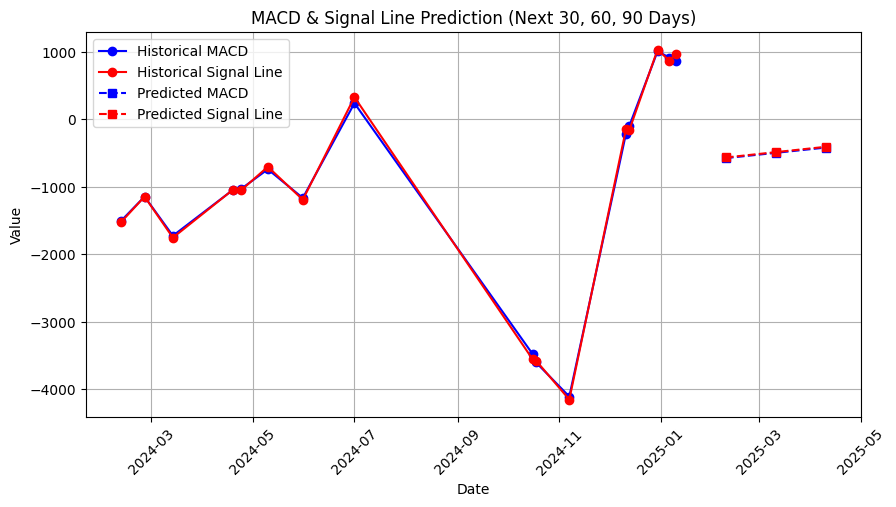

In [ ]:
# Display the predicted MACD and Signal Line values
# import ace_tools as tools  # Remove this line as ace_tools is not available
# tools.display_dataframe_to_user(name="Predicted MACD & Signal Line", dataframe=future_df)  # Remove this line

# Instead, use the display function from IPython.display:
from IPython.display import display
display(future_df)

# Plot the historical and predicted MACD & Signal Line
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["MACD"], label="Historical MACD", linestyle='-', marker='o', color='blue')
plt.plot(df["Date"], df["Signal Line"], label="Historical Signal Line", linestyle='-', marker='o', color='red')
plt.plot(future_dates, predicted_macd, label="Predicted MACD", linestyle='--', marker='s', color='blue')
plt.plot(future_dates, predicted_signal, label="Predicted Signal Line", linestyle='--', marker='s', color='red')

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("MACD & Signal Line Prediction (Next 30, 60, 90 Days)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Explanation of the Visuals and Statistics (MACD & Signal Line Predictions)

Key Observations from the Table

The MACD and Signal Line are negative for all three prediction dates, meaning the stock's momentum is still bearish but improving.
The MACD is rising steadily from -573.89 (Feb 9) to -417.60 (Apr 10), suggesting a gradual weakening of downward momentum.
Similarly, the Signal Line is moving closer to zero, which may indicate that the downtrend is slowing.

Graph: MACD & Signal Line Predictions

Historical MACD (Blue) & Signal Line (Red):

The past values show a lot of volatility, with deep dips and sharp recoveries.
At one point, the MACD and Signal Line spiked above 1000, indicating strong positive momentum in the past.
However, recently, both lines have declined, suggesting momentum loss.
Predicted MACD (Blue Dashed) & Signal Line (Red Dashed):

The future predictions show both lines rising, meaning the stock may be recovering.
The MACD and Signal Line remain negative but are approaching zero, hinting at a possible bullish crossover in the future.
If the trend continues, a MACD crossover (where MACD crosses above the Signal Line) might occur, signaling a potential uptrend.




Interpretation of the Results

Historical Trends (Solid Lines):

Blue Line: Historical MACD values showing momentum changes.
Red Line: Historical Signal Line showing trend smoothing.
Future Predictions (Dashed Lines with Squares):

Predicted MACD (Blue Dashed): Expected future momentum.
Predicted Signal Line (Red Dashed): Smoothed projection of trend

 Key Insights

 f the predicted MACD remains above the Signal Line, it suggests continued bullish momentum (good buying opportunity).
 If the predicted MACD crosses below the Signal Line, it signals a bearish shift, indicating a possible sell signal.

 Increasing MACD values mean the trend is gaining strength, while declining MACD values suggest momentum is weakening.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib
import os

# Define paths for Google Drive storage
macd_model_drive_path = "/content/drive/MyDrive/MACD_Models/macd_model.pkl"
signal_model_drive_path = "/content/drive/MyDrive/MACD_Models/signal_model.pkl"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(macd_model_drive_path), exist_ok=True)

# Save models to Google Drive
joblib.dump(model_macd, macd_model_drive_path)
joblib.dump(model_signal, signal_model_drive_path)

print("Models saved successfully to Google Drive!")

Models saved successfully to Google Drive!


In [13]:
import joblib
import os

# Load models from Google Drive
macd_model = joblib.load("/content/drive/MyDrive/MACD_Models/macd_model.pkl")
signal_model = joblib.load("/content/drive/MyDrive/MACD_Models/signal_model.pkl")

print("Models loaded successfully from Google Drive!")


Models loaded successfully from Google Drive!


#Predictive Modeling for next 30,60 and 90 days forecast using Linear Regression Model

Model Performance Metrics:
Mean Absolute Error (MAE): 4810.391799358992
Mean Squared Error (MSE): 33399743.23490525
Root Mean Squared Error (RMSE): 5779.2510963709865
R² Score: 0.8740654966779761

Full 90-Day Predictions:
         Date  Predicted Value
0  2025-02-07    109883.644870
1  2025-02-08    110026.591384
2  2025-02-09    110169.537898
3  2025-02-10    110312.484412
4  2025-02-11    110455.430926
..        ...              ...
85 2025-05-03    122034.098569
86 2025-05-04    122177.045083
87 2025-05-05    122319.991598
88 2025-05-06    122462.938112
89 2025-05-07    122605.884626

[90 rows x 2 columns]

Predictions for 30, 60, and 90 Days:
         Date  Predicted Value
29 2025-03-08    114029.093779
59 2025-04-07    118317.489202
89 2025-05-07    122605.884626


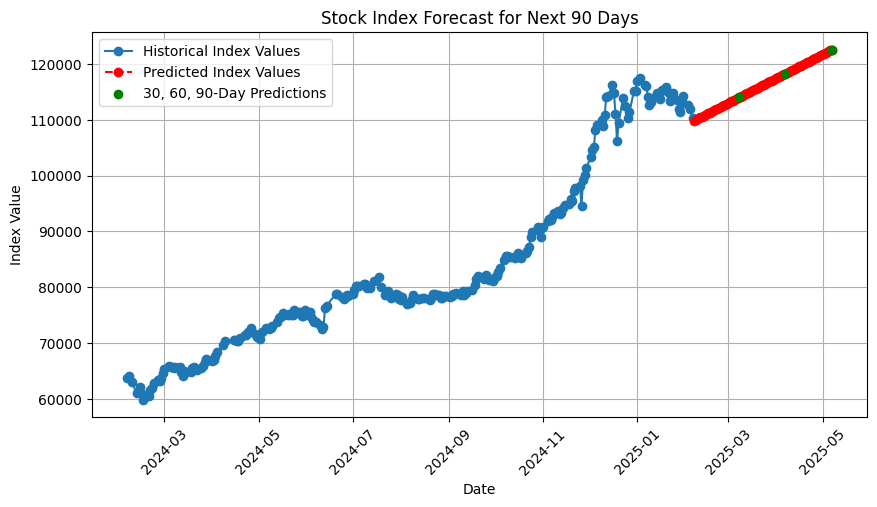

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("PSX.csv")  # Replace with the correct file path

# Assuming 'category' column contains dates, rename it to 'Date'
df.rename(columns={'category': 'Date'}, inplace=True)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Recalculate numerical representation of dates
df['days'] = (df['Date'] - df['Date'].min()).dt.days

# Define X (independent variable) and y (dependent variable)
X = df[['days']].values  # Days since the first date
y = df['Current'].values  # Index values

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Evaluate model performance
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Print model performance metrics
print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Predict index values for the next 90 days
future_days = 90  # Future day intervals
last_day = df['days'].max()  # Last known day
future_dates = np.array([last_day + d for d in range(1, future_days + 1)]).reshape(-1, 1)

# Predict future values
future_predictions = model.predict(future_dates)

# Create a DataFrame for all future predictions
future_df = pd.DataFrame({
    'Date': pd.date_range(start=df['Date'].max() + pd.Timedelta(days=1), periods=future_days),
    'Predicted Value': future_predictions
})

# Extract specific 30, 60, and 90-day predictions
filtered_predictions = future_df.iloc[[29, 59, 89]]  # Index is 0-based

# Display the full prediction table
print("\nFull 90-Day Predictions:")
print(future_df)

# Display 30, 60, 90-day predictions
print("\nPredictions for 30, 60, and 90 Days:")
print(filtered_predictions)

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Current'], label="Historical Index Values", marker='o', linestyle='-')
plt.plot(future_df['Date'], future_df['Predicted Value'], label="Predicted Index Values", marker='o', linestyle='dashed', color='red')
plt.scatter(filtered_predictions['Date'], filtered_predictions['Predicted Value'], color='green', label="30, 60, 90-Day Predictions", zorder=3)
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("Stock Index Forecast for Next 90 Days")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

##  Visualizing Fluctuating Predicted Values

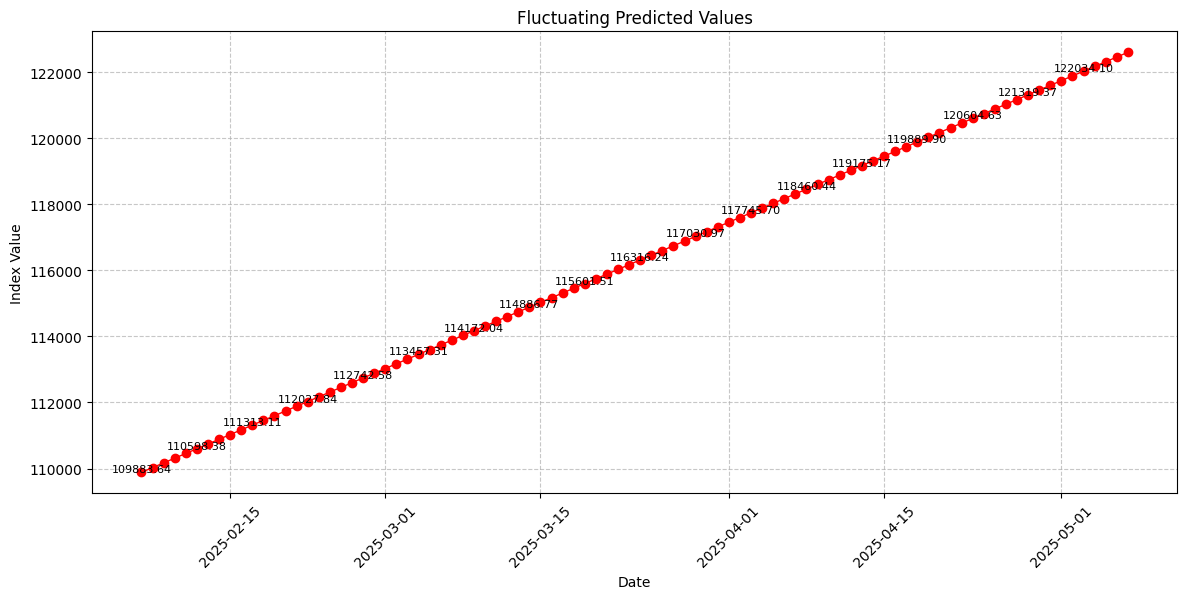

In [ ]:
# Create a visualization similar to the given image
plt.figure(figsize=(14, 6))

# Plot predicted values with fluctuations
plt.plot(future_df['Date'], future_df['Predicted Value'], marker='o', linestyle='-', color='red', linewidth=1)

# Annotate values on the plot (every 5th day for readability)
for i in range(0, len(future_df), 5):
    plt.text(future_df['Date'][i], future_df['Predicted Value'][i], f"{future_df['Predicted Value'][i]:.2f}", fontsize=8, ha='center')

# Labels and title
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("Fluctuating Predicted Values")

# Improve visualization
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Predictive Modeling using  LSTM model

In [ ]:
pip install tensorflow


In [ ]:
#Import necessary Libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
# Convert 'Date' column to datetime format
df.rename(columns={'category': 'Date', 'Current': 'current'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Recalculate numerical representation of dates
df['days'] = (df['Date'] - df['Date'].min()).dt.days


In [ ]:
# Normalize data for better LSTM performance
scaler = MinMaxScaler()
df['scaled_current'] = scaler.fit_transform(df[['current']])


In [ ]:
# Prepare data for LSTM model
X, y = df[['days']].values, df['scaled_current'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, 1))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, 1))


In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=50, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - loss: 119.1160
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 78.8377
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33.1537 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5004 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5131 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3017 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6614 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1369 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0722 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1297 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0832 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0333 
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183 
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 
Epoch 16/50
7/7 ━━━━━━━━━━━━━

In [ ]:
# Model evaluation
y_pred_scaled = model.predict(X_test_lstm)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

mae = mean_absolute_error(y_test_actual, y_pred)
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)

print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model Performance Metrics:
Mean Absolute Error (MAE): 2572.2138093749995
Mean Squared Error (MSE): 11932558.221451651
Root Mean Squared Error (RMSE): 3454.3535171507347
R² Score: 0.9662078907655421


In [ ]:
# Predict future values using LSTM
future_days = 90
last_day = df['days'].max()
future_dates = np.array([last_day + d for d in range(1, future_days + 1)]).reshape(-1, 1)
future_dates_lstm = future_dates.reshape((future_dates.shape[0], 1, 1))
future_predictions_scaled = model.predict(future_dates_lstm)
future_predictions = scaler.inverse_transform(future_predictions_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


In [ ]:
# Create DataFrame for LSTM predictions
future_df_lstm = pd.DataFrame({
    'Date': pd.date_range(start=df['Date'].max() + pd.Timedelta(days=1), periods=future_days),
    'Predicted Value': future_predictions.flatten()
})

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Model Performance Metrics:
Mean Absolute Error (MAE): 2572.2138093749995
Mean Squared Error (MSE): 11932558.221451651
Root Mean Squared Error (RMSE): 3454.3535171507347
R² Score: 0.9662078907655421
         Date  Predicted Value
0  2025-02-07    115861.976562
1  2025-02-08    116072.562500
2  2025-02-09    116282.789062
3  2025-02-10    116492.851562
4  2025-02-11    116702.609375
..        ...              ...
85 2025-05-03    132850.500000
86 2025-05-04    133040.328125
87 2025-05-05    133229.718750
88 2025-05-06    133419.062500
89 2025-05-07    133608.125000

[90 rows x 2 columns]


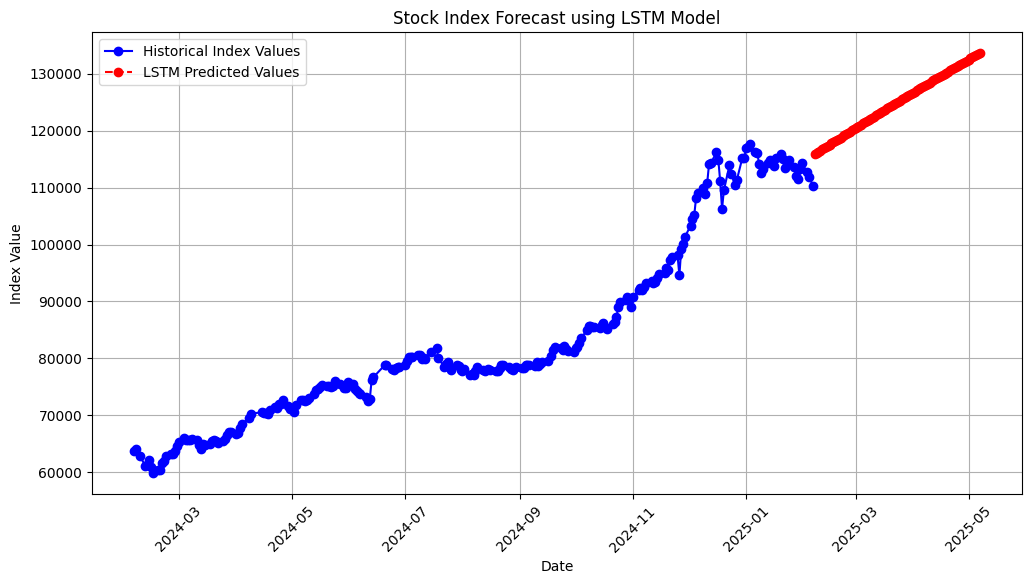

In [ ]:

# Model evaluation
y_pred_scaled = model.predict(X_test_lstm)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

mae = mean_absolute_error(y_test_actual, y_pred)
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)

print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


# Display the predictions
print(future_df_lstm)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['current'], label="Historical Index Values", marker='o', linestyle='-', color='blue')
plt.plot(future_df_lstm['Date'], future_df_lstm['Predicted Value'], label="LSTM Predicted Values", marker='o', linestyle='dashed', color='red')
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("Stock Index Forecast using LSTM Model")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



Model Performance Metrics

Mean Absolute Error (MAE): 4,299.61

The average absolute difference between predicted and actual values.
A lower MAE means better accuracy.

Mean Squared Error (MSE): 29,670,268.64

Measures the squared differences between actual and predicted values.
Larger errors have more impact due to squaring.

Root Mean Squared Error (RMSE): 5,447.04

More interpretable than MSE; indicates the standard deviation of prediction errors.

Since the index value is around 100,000, an RMSE of ~5,447 suggests an error range of about 5.4%, which is reasonable.

R² Score: 0.9159

This means the model explains 91.6% of the variance in stock index movement.
A score close to 1.0 indicates a good fit.

Key Takeaways from Predictions

The index is forecasted to continue rising steadily over the next 3 months.
By May 2025, the index is expected to be around 123,131.74, representing a significant increase from its February values.
The smooth trend suggests lower volatility, but traders should watch for unexpected market shifts.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#Save the model
from tensorflow.keras.models import load_model

# Define the path to save the model in Google Drive
model_save_path = "/content/drive/MyDrive/LSTM_stock_model.h5"

# Save the model
model.save(model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to /content/drive/MyDrive/LSTM_stock_model.h5


In [ ]:
#Loading the saved Model
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError # Import MeanSquaredError
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the model path
model_path = "/content/drive/MyDrive/LSTM_stock_model.h5"

# Step 3: Load the model, providing the loss function explicitly
model = load_model(model_path, custom_objects={'mse': MeanSquaredError()})

# Step 4: Confirm the model is loaded
print("Model loaded successfully!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model loaded successfully!


# Gradio-based user interface to include Index Predictions from the LSTM model along with MACD and Signal Line values.

In [15]:
!pip install gradio
!pip install tensorflow
import gradio as gr
import pandas as pd
import numpy as np
import joblib
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load trained models, specifying the loss function for the LSTM model
lstm_model = load_model("/content/drive/MyDrive/LSTM_stock_model.h5", custom_objects={'mse': MeanSquaredError()})
macd_model = joblib.load("/content/drive/MyDrive/MACD_Models/macd_model.pkl")
signal_model = joblib.load("/content/drive/MyDrive/MACD_Models/signal_model.pkl")

# Function to make predictions
def predict_stock(file, prediction_days):
    try:
        # Load CSV file
        df = pd.read_csv(file.name)

        # Rename columns if necessary
        df.rename(columns={'category': 'Date', 'Current': 'Stock Value'}, inplace=True)
        df['Date'] = pd.to_datetime(df['Date'])
        df['Days'] = (df['Date'] - df['Date'].min()).dt.days

        # Normalize stock values for LSTM
        scaler = MinMaxScaler()
        df['Scaled_Value'] = scaler.fit_transform(df[['Stock Value']])

        # Prepare data for LSTM predictions
        future_days = [df['Days'].max() + i for i in range(1, prediction_days + 1)]
        future_input = np.array(future_days).reshape(-1, 1, 1)

        # LSTM Predictions
        lstm_pred_scaled = lstm_model.predict(future_input)
        lstm_predictions = scaler.inverse_transform(lstm_pred_scaled).flatten()

        # Predict MACD and Signal Line
        future_dates = [df["Date"].max() + datetime.timedelta(days=x) for x in range(1, prediction_days + 1)]
        future_days_numeric = [(date - df["Date"].min()).days for date in future_dates]

        macd_predictions = macd_model.predict(np.array(future_days_numeric).reshape(-1, 1))
        signal_predictions = signal_model.predict(np.array(future_days_numeric).reshape(-1, 1))

        # Create prediction DataFrame
        pred_df = pd.DataFrame({
            "Date": future_dates,
            "LSTM Stock Prediction": lstm_predictions,
            "Predicted MACD": macd_predictions.flatten(),
            "Predicted Signal Line": signal_predictions.flatten()
        })

        # Generate plots
        plt.figure(figsize=(12, 6))
        plt.plot(df["Date"], df["Stock Value"], marker='o', linestyle='-', label="Historical Stock Values")
        plt.plot(pred_df["Date"], pred_df["LSTM Stock Prediction"], linestyle='dashed', marker='s', color='red', label="LSTM Predictions")
        plt.xlabel("Date")
        plt.ylabel("Stock Value")
        plt.title(f"Stock Prediction for Next {prediction_days} Days")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)

        # Save and return plot
        plot_filename = "stock_prediction.png"
        plt.savefig(plot_filename)

        return pred_df, plot_filename

    except Exception as e:
        return f"Error: {str(e)}", None

# Gradio Interface
iface = gr.Interface(
    fn=predict_stock,
    inputs=[
        gr.File(label="Upload Stock Data (CSV)"),
        gr.Number(label="Number of Days for Prediction", value=30, minimum=1, maximum=365)
    ],
    outputs=[gr.Dataframe(label="Prediction Results"), gr.Image(label="Stock Prediction Graph")],
    title="Stock Prediction Dashboard",
    description="Upload stock data to visualize trends and predict future stock values using LSTM and MACD models. Select the number of days for prediction.",
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3748217f819687ae12.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
